## Hồi quy tuyến tính
### 1. Mô hình hồi quy tuyến tính
$$h(x) = \beta_0 + \beta_1x_1 + ... + \beta_n x_n$$ 

Để cho đơn giản ta có thể bổ sung tham số giả $x_0 = 1$. Khi đó công thức trên sẽ được viết lại như sau:

$$h(x) = \sum_{i=0}^{n} \beta_i x_i$$

### 2. Hàm lỗi
Ta có hàm lỗi như sau:
$$J(\beta) = \frac{1}{2} \sum_{i=1}^{m} (h(x_i) - y_i)^2$$
$$= \frac{1}{2} \sum_{i=1}^{m} (\sum_{j=0}^{n} (\beta_j x_{ij} - y_i)^2)$$

trong đó $m$ là số ví dụ trong tập huấn luyện. *Mục tiêu của việc huấn luyện mô hình* là xác định tham số $\beta_i$ sao cho hàm lỗi $J$ đạt giá trị nhỏ nhất.

### 3. Xác định tham số bằng cách giải phương trình tuyến tính
Cho dữ liệu có $m$ dữ liệu huấn luyện và mỗi dữ liệu huấn luyện có $n$ đặc trưng, ta có công thức giải phương trình tuyến tính sau đây:

$$\beta = (X^T X)^{-1} X^T Y$$

Với,

$X = 
\begin{bmatrix}
    1 & x_{1,1} & x_{1,2} & \cdots & x_{1, n} \\
    1 & x_{2,1} & x_{2,2} & \cdots & x_{2, n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{m,1} & x_{m,2} & \cdots & x_{m, n}
\end{bmatrix}
$,

$Y = 
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{m} \\
\end{bmatrix}
$,

$\beta = 
\begin{bmatrix}
    \beta_{0} & \beta_{1} & \cdots & \beta_{n}
\end{bmatrix}
$

Sau đây sẽ là một bài toán hồi quy tuyến tính sử dụng 100 dữ liệu mẫu, mỗi dữ liệu mẫu sẽ chỉ có 1 đặc trưng

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

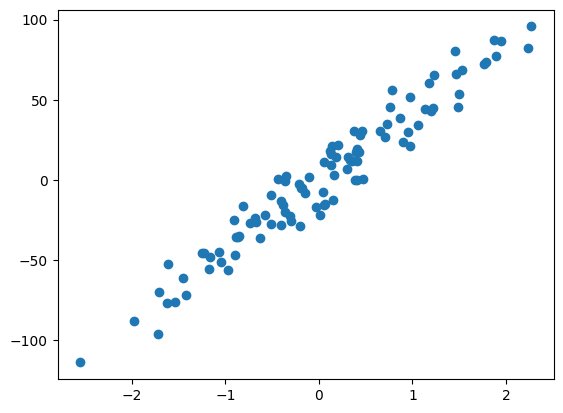

In [5]:
x, y = make_regression(n_samples=100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=10, 
                       random_state=0)
plt.scatter(x, y)

In [9]:
def add_intercept_ones(x):
    intercept_ones = np.ones((len(x), 1))
    X_b = np.c_[intercept_ones, x]
    return X_b

In [12]:
def normal_equation_linear_regression(x, y):
    X_b = add_intercept_ones(x)
    beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return beta

In [25]:
beta_1 = normal_equation_linear_regression(x, y)
beta_1

array([-0.81418183, 42.61943029])

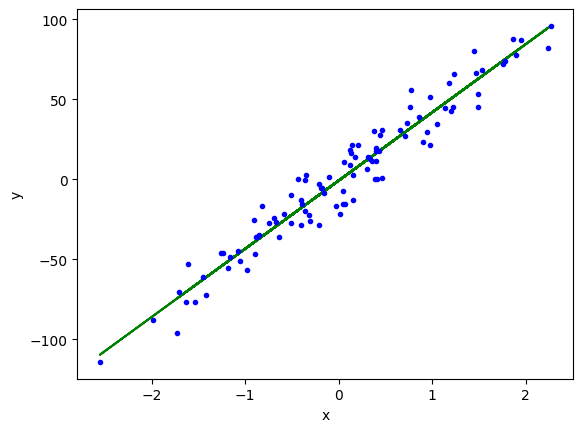

In [44]:
h_1 = np.dot(add_intercept_ones(x), beta_1)
plt.plot(x, h_1, "g-")
plt.plot(x, y, "b.")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 4. Xác định tham số bằng phương pháp giảm gradient
#### 4.1. Batch gradient descent
for (j = 0 to n) \{
    \
    $\beta_j$ &larr; $\beta_j + \alpha \sum_{i=1}^{m} (y_i - h(x_i))x_{ij}$
    \
\}

In [39]:
# y = b0 + b1*x
def batch_gradient_descent(x, y, number_of_iterations, learning_rate):
    m = len(y)
    b_0 = 0
    b_1 = 0
    for i in range(number_of_iterations):
        d_0 = 0
        d_1 = 0
        for j in range(m):
            d_0 += (y[j] - (b_0 + b_1 * x[j]))
            d_1 += x[j] * (y[j] - (b_0 + b_1 * x[j]))
            
        b_0 = b_0 + learning_rate * d_0
        b_1 = b_1 + learning_rate * d_1

    return [b_0, b_1]

In [40]:
number_of_iterations = 1000
learning_rate = 0.01
beta_2 = batch_gradient_descent(x, y, number_of_iterations, learning_rate)
beta_2

[array([-0.81418183]), array([42.61943029])]

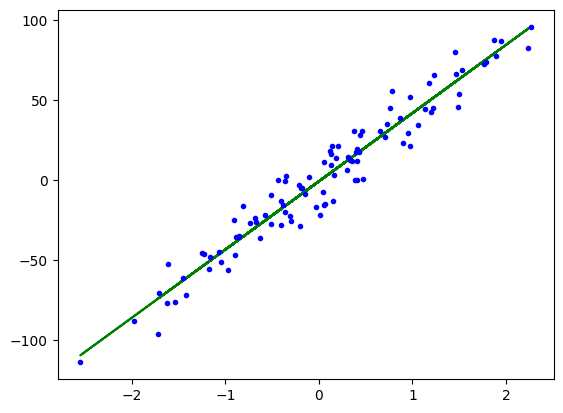

In [43]:
h_2 = beta_2[0] + beta_2[1] * x 
plt.plot(x, h_2, "g-")
plt.plot(x, y, "b.")
plt.show()

#### 5. Stochastic gradient descent

In [37]:
# y = b0 + b1*x
def stochastic_gradient_descent(x, y, number_of_iterations, learning_rate):
    m = len(y)
    b_0 = 0
    b_1 = 0
    for _ in range(number_of_iterations):
        for i in range(m):
            b_0 = b_0 + learning_rate * (y[i] - (b_0 + b_1 * x[i]))
            b_1 = b_1 + learning_rate * (y[i] - (b_0 + b_1 * x[i])) * x[i]

    return [b_0, b_1]

[array([-1.01284403]), array([42.06631909])]


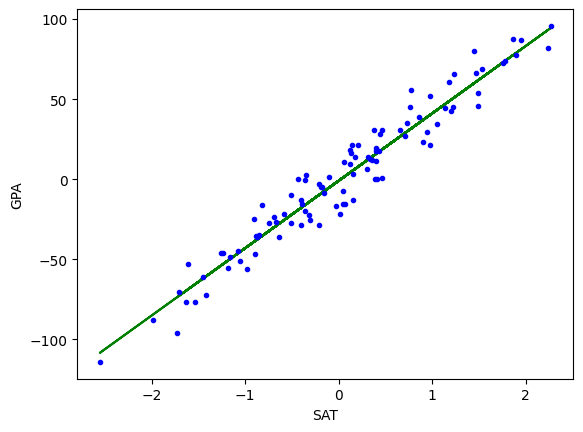

In [45]:
beta_3 = stochastic_gradient_descent(x, y, 100, 0.01)
print(beta_3)
h_3 = beta_3[0] + beta_3[1] * x
plt.plot(x, h_3, "g-")
plt.plot(x, y, "b.")
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

#### 6. So sánh giữa phương trình tuyến tính, batch gradient descent và stochastic gradient descent
$$MSE = \frac{1}{N} \sum_{i=0}^{n} {(y(x_i) - h(x_i))}^{2}$$

In [46]:
def mse(y, h):
    N = len(y)
    return np.sum((y - h) ** 2) / N

In [47]:
print(mse(y, h_1))
print(mse(y, h_2))
print(mse(y, h_3))

114.17148616819482
380449.8606508978
375697.0345328133


Qua đó rút ra kết luận rằng:
- Phương pháp giải phương trình tuyến tính là tối ưu cao nhất
- Stochastic gradient descent tỏ ra vượt trội hơn so với batch gradient descent

Tuy nhiên nếu ta cải tiến batch gradient descent và stochastic gradient descent thì sao?

In [211]:
def batch_gradient_descent_upgrade(x, y, number_of_iterations, learning_rate):
    m = len(y)
    b_0 = 0
    b_1 = 0
    y_predicted = b_0 + b_1 * x
    costs_reduction = [mse(y, y_predicted)]
    for i in range(number_of_iterations):
        d_0 = 0
        d_1 = 0
        for j in range(m):
            d_0 += (y[j] - (b_0 + b_1 * x[j]))
            d_1 += x[j] * (y[j] - (b_0 + b_1 * x[j]))
            
        b_0 = b_0 + learning_rate * d_0
        b_1 = b_1 + learning_rate * d_1

        regressed_y = b_0 + b_1 * x
        costs_reduction.append(mse(y, regressed_y))

        if np.sum(costs_reduction[-3:]) / costs_reduction[-1:] == 3:
            print("gradient descent convergence point reached at iteration : " + str(i))
            break

    return [b_0, b_1]

In [216]:
def stochastic_gradient_descent_upgrade(x, y, learning_rate):
    m = len(y)
    b_0 = 0
    b_1 = 0
    y_predicted = b_0 + b_1 * x
    min_cost = mse(y, y_predicted)
    value = [0, 0]
    ith = -1
    for i in range(m):
        b_0 = b_0 + learning_rate * (y[i] - (b_0 + b_1 * x[i]))
        b_1 = b_1 + learning_rate * (y[i] - (b_0 + b_1 * x[i])) * x[i]
        
        regressed_y = b_0 + b_1 * x
        new_cost = mse(y, regressed_y)
        if new_cost < min_cost:
            value = [b_0, b_1]
            min_cost = new_cost
            ith = i

    return value, ith

In [217]:
beta_2_new = batch_gradient_descent_upgrade(x, y, 1000, 0.01)
beta_3_new, ith = stochastic_gradient_descent_upgrade(x, y, 0.01)

h_2_new = beta_2_new[0] + beta_2_new[1] * x
h_3_new = beta_3_new[0] + beta_3_new[1] * x

print(mse(y, h_2_new))
print(mse(y, h_3_new), ith)

gradient descent convergence point reached at iteration : 15
380449.8606508978
196195.71069070033 2
